# Bioinformatics Workshop 2021
### Cascabel_S5_practice
### Running Cascabel pipeline with DADA2 (ASV)
#### Maartje Brouwer
#### 2021 Feb 15
###### This notebook is running Python 3.6.7

In [4]:
# Go to the correct directory
%cd /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/CASCABEL

/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/CASCABEL


In [5]:
# activate conda, qiime, correct version of R
! source ~/.bashrc.conda3
! source activate qiime1
! export PATH=$PATH:/opt/biolinux/anaconda3/bin
! module load R/4.0.3
! unset LD_PRELOAD

Anaconda is now active on server ada with base /opt/biolinux/anaconda3          python version : 3.6.7.final.0
Run "conda deactivate" command to deactivate and exit current python environment


### 11. edit the correct configutation file
! nano config.asv.double_bc.yaml

PROJECT: "BlackSea"
LIBRARY: ["NIOZ101"]
RUN: "Worshop_Test"
fw_reads: "/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ101_1.fastq"
rv_reads: "/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ101_2.fastq"
metadata: "/export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/ProjectInfo/NIOZ101/NIOZ101_18S_blackSea.txt"

#### Dada2 requires clean fastq files per sample. With “clean” we mean, no barcodes and no primers. In the previous run, these files were already generated, so we are going to take advantage of that, that is why we “re-use” the same PROJECT, and the same RUN. Cascabel will not overwrite the results for different workflows! And you will have a different report at the end.

alignRep:
  align: "F"             # skip the alignment for the representative sequences
  m: "pynast"
  extra_params: ""

dada2_filter:
  generateQAplots: "T"
  truncFW: 250
  truncRV: 240
  maxEE_FW: 3
  maxEE_RV: 5
  cpus: 10
  extra_params: "\",truncQ=2, rm.phix=TRUE\""
#### Be aware that FW and RV reads shorter than truncFW and truncRV respectively are discarded ☹ and we don’t want to discard too many reads!

dada2_taxonomy:
  db: "/export/data01/databases/silva/r138/dada2/silva_nr_v138_train_set.fa.gz"
  extra_params: "minBoot=45"
  add_sps:
    add: "T"
    db_sps: "/export/data01/databases/silva/r138/dada2/silva_species_assignment_v138.fa.gz"
    extra_params: "allowMultiple=TRUE"

#### Save your configuration file and name it with something meaningful according to the chosen library and clustering algorithm. e.g., config.asv.double_bc.N101.yaml
Ctrl + o       --- change name
Yes
Ctrl + x

In [6]:
## 12. Create the DAG (directed acyclic graph) for your run. 
# Send it to a svg file called ASV_WF_dada2.svg
! snakemake --configfile config.asv.double_bc.NIOZ101.yaml --dag | dot -Tsvg > ASV_WF_dada2.svg
# A DAG is a visual representation of the entire pipeline that will be run.

In [4]:
## 13. make a dry-run to see the commands 
! snakemake --configfile config.asv.double_bc.NIOZ101.yaml -np

## 14. The execution plan contains 49 rules (see bottom line)


rule init_structure:
    input: /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ101_1.fastq, /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ101_2.fastq, /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/ProjectInfo/NIOZ101/NIOZ101_18S_blackSea.txt
    output: BlackSea/samples/NIOZ101/rawdata/fw.fastq, BlackSea/samples/NIOZ101/rawdata/rv.fastq, BlackSea/metadata/sampleList_mergedBarcodes_NIOZ101.txt
    jobid: 23
    wildcards: PROJECT=BlackSea, sample=NIOZ101

Scripts/init_sample.sh BlackSea NIOZ101 /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/ProjectInfo/NIOZ101/NIOZ101_18S_blackSea.txt /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ101_1.fastq /export/lv3/scratch/workshop_2021/Users/maartje/BlackSea_2013/Data/RawData/NIOZ101_2.fastq

rule fast_qc:
    input: BlackSea/samples/NIOZ101/rawdata/fw.fastq, BlackSea/samples/NIOZ101/rawdata/rv.fastq
    output: BlackSe

    input: BlackSea/runs/Worshop_Test/asv/taxonomy_dada2/asvTable.biom, BlackSea/runs/Worshop_Test/asv/taxonomy_dada2/summary/asvTable_L6.txt, BlackSea/runs/Worshop_Test/asv/taxonomy_dada2/summary_noSingletons/asvTable_noSingletons_L6.txt, BlackSea/runs/Worshop_Test/asv/taxonomy_dada2/representative_seq_set_noSingletons.fasta, BlackSea/runs/Worshop_Test/report_files/krona_report.dada2.html, BlackSea/runs/Worshop_Test/samples.log
    output: BlackSea/runs/Worshop_Test/reporttmp_all.html
    jobid: 7
    benchmark: BlackSea/runs/Worshop_Test/report_all.benchmark
    wildcards: PROJECT=BlackSea, run=Worshop_Test


rule tune_report_all:
    input: BlackSea/runs/Worshop_Test/reporttmp_all.html
    output: BlackSea/runs/Worshop_Test/asv_report_dada2.html
    jobid: 5
    wildcards: PROJECT=BlackSea, run=Worshop_Test


rule distribution_chart:
    input: BlackSea/runs/Worshop_Test/NIOZ101_data/seqs_fw_rev_filtered.dist.txt
    output: BlackSea/runs/Worshop_Test/report_files/seqs_fw_rev_filter

##### 15. Run the pipeline
snakemake --configfile config.asv.double_bc.NIOZ101.yaml

you cannot continue in Jupyter

FastQC gave some messages again, but I continued
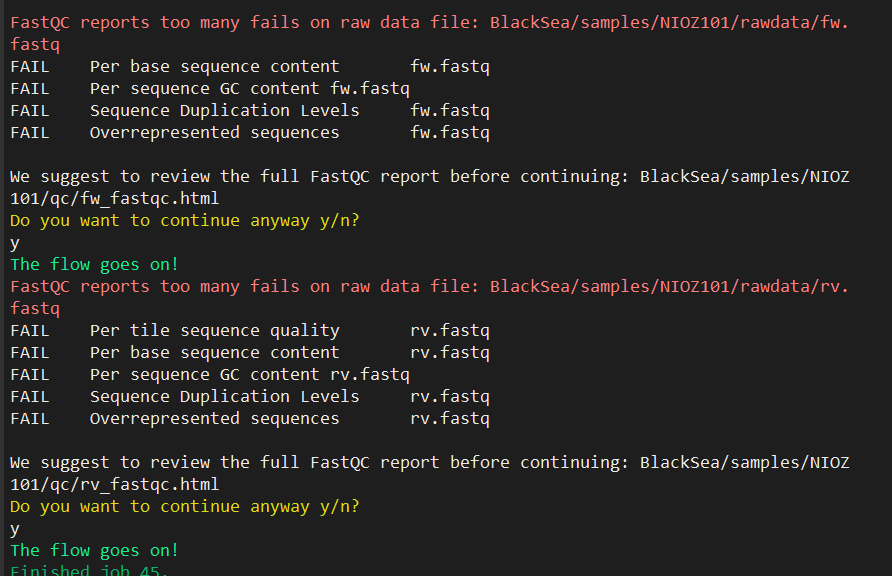

On interactive mode the pipeline will stop at the length filtering step (rule: remove_short_long_reads). 
Print the sequence length histogram
Adjust the minimum and maximum values to include sequences with at least 20 reps according to their length.
3. shortest 364 - longest 385

transfer that file to your computer --> C:\Users\dnalab\Desktop\unix_workshop\Cascabel\report_dada2.zip exit server. go to directory

! cd /home/mobaxterm/Desktop/unix_workshop/Cascabel

Un-compress the file and inspect the report

! unzip report_dada2.zip